In [3]:
# Step 1: Initial Setup and Data Loading

# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# Set plotting style and figure size
plt.style.use('classic')
plt.rcParams['figure.figsize'] = [12, 6]

# Load the dataset
df = pd.read_csv('song_dataset.csv')

# Display basic information about the dataset
print("1. Basic Dataset Information:")
print("-" * 50)
print(df.info())

print("\n2. First few rows of the dataset:")
print("-" * 50)
print(df.head())

print("\n3. Basic statistical summary:")
print("-" * 50)
print(df.describe())

print("\n4. Check for missing values:")
print("-" * 50)
print(df.isnull().sum())


1. Basic Dataset Information:
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102627 entries, 0 to 102626
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   user         102627 non-null  object
 1   song         102627 non-null  object
 2   play_count   102627 non-null  int64 
 3   title        102627 non-null  object
 4   release      102627 non-null  object
 5   artist_name  102627 non-null  object
 6   year         102627 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 5.5+ MB
None

2. First few rows of the dataset:
--------------------------------------------------
                                       user                song  play_count  \
0  b80344d063b5ccb3212f76538f3d9e43d87dca9e  SOAKIMP12A8C130995           1   
1  b80344d063b5ccb3212f76538f3d9e43d87dca9e  SOAPDEY12A81C210A9           1   
2  b80344d063b5ccb3212f76538f3d9e43d87dca9e  SOBBMDR1


5. Most Listened Songs Analysis:
--------------------------------------------------


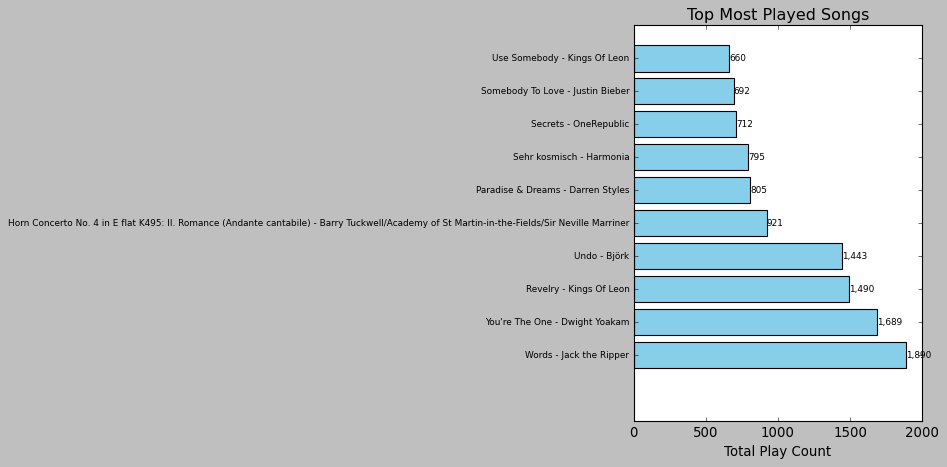


Top Songs Details:
                                                   title  \
43052                                              Words   
43833                                     You're The One   
30103                                            Revelry   
40415                                               Undo   
16038  Horn Concerto No. 4 in E flat K495: II. Romanc...   
27738                                  Paradise & Dreams   
31616                                      Sehr kosmisch   
31557                                            Secrets   
33512                                   Somebody To Love   
40636                                       Use Somebody   

                                             artist_name  play_count  
43052                                    Jack the Ripper        1890  
43833                                      Dwight Yoakam        1689  
30103                                      Kings Of Leon        1490  
40415                              

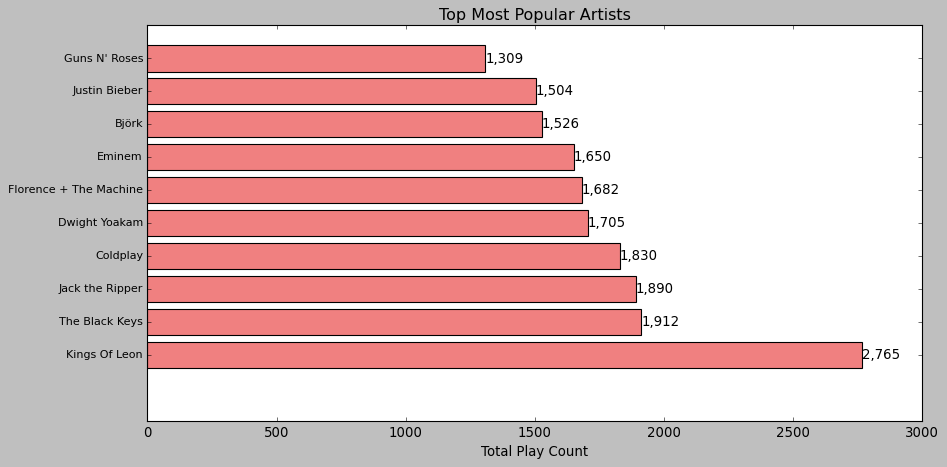


Top Artists Details:
                  artist_name  play_count
5686            Kings Of Leon        2765
10056          The Black Keys        1912
4726          Jack the Ripper        1890
2150                 Coldplay        1830
3089            Dwight Yoakam        1705
3676   Florence + The Machine        1682
3288                   Eminem        1650
1188                    Björk        1526
5403            Justin Bieber        1504
4195            Guns N' Roses        1309

7. User Listening Patterns Analysis:
--------------------------------------------------


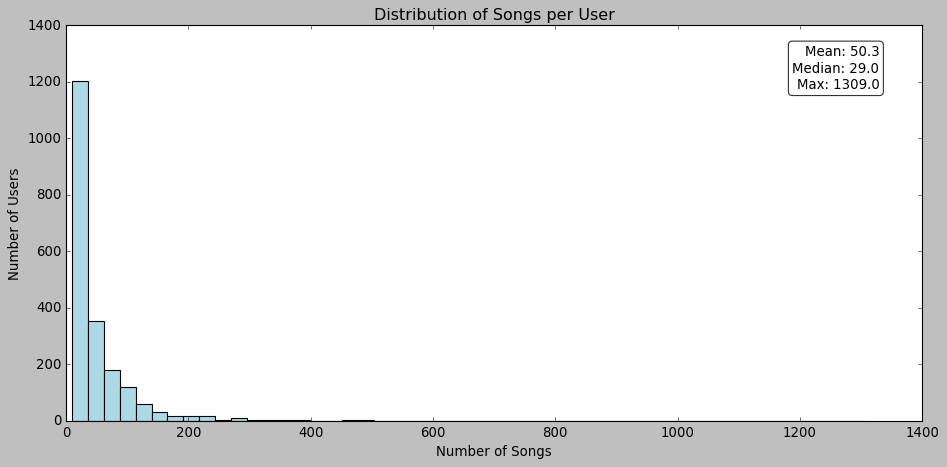


User Listening Statistics:
--------------------------------------------------
count    2042.000000
mean       50.258080
std        65.800267
min        10.000000
25%        17.000000
50%        29.000000
75%        58.000000
max      1309.000000
Name: song, dtype: float64

8. Year-wise Distribution:
--------------------------------------------------


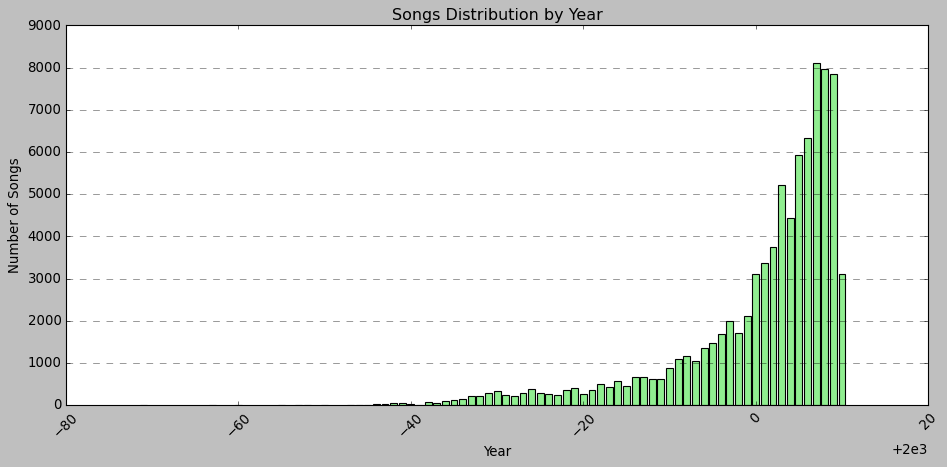


9. Summary Statistics for Play Counts:
--------------------------------------------------
count    102627.000000
mean          2.885790
std           8.569376
min           1.000000
25%           1.000000
50%           1.000000
75%           3.000000
max        1890.000000
Name: play_count, dtype: float64

10. Overall Analysis Summary:
--------------------------------------------------
total_unique_songs: 44458
total_unique_artists: 11928
total_users: 2042
total_plays: 296160
avg_plays_per_song: 2.885790289105206
median_plays_per_song: 1.0
years_range: 1929 - 2010


In [4]:

# Set plotting style and figure size
plt.style.use('classic')
plt.rcParams['figure.figsize'] = [12, 6]

def plot_most_listened_songs(df, top_n=10):
    """Plot the top N most listened songs"""
    # Group by song title and sum play counts
    song_stats = df.groupby(['title', 'artist_name'])['play_count'].sum().reset_index()
    song_stats = song_stats.sort_values('play_count', ascending=False).head(top_n)
    
    # Create the plot
    plt.figure(figsize=(12, 6))
    bars = plt.barh(range(len(song_stats)), song_stats['play_count'], color='skyblue')
    plt.yticks(range(len(song_stats)), 
               [f"{t} - {a}" for t, a in zip(song_stats['title'], song_stats['artist_name'])],
               fontsize=8)
    
    # Add value labels on the bars
    for i, bar in enumerate(bars):
        width = bar.get_width()
        plt.text(width, bar.get_y() + bar.get_height()/2, 
                f'{int(width):,}', 
                ha='left', va='center', fontsize=8)
    
    plt.title('Top Most Played Songs')
    plt.xlabel('Total Play Count')
    plt.tight_layout()
    plt.show()
    
    return song_stats

def plot_popular_artists(df, top_n=10):
    """Plot the top N most popular artists"""
    # Group by artist and sum play counts
    artist_stats = df.groupby('artist_name')['play_count'].sum().reset_index()
    artist_stats = artist_stats.sort_values('play_count', ascending=False).head(top_n)
    
    # Create the plot
    plt.figure(figsize=(12, 6))
    bars = plt.barh(range(len(artist_stats)), artist_stats['play_count'], color='lightcoral')
    plt.yticks(range(len(artist_stats)), artist_stats['artist_name'], fontsize=10)
    
    # Add value labels on the bars
    for i, bar in enumerate(bars):
        width = bar.get_width()
        plt.text(width, bar.get_y() + bar.get_height()/2, 
                f'{int(width):,}', 
                ha='left', va='center')
    
    plt.title('Top Most Popular Artists')
    plt.xlabel('Total Play Count')
    plt.tight_layout()
    plt.show()
    
    return artist_stats

def plot_user_listening_distribution(df):
    """Plot the distribution of songs per user"""
    # Calculate number of songs per user
    user_song_counts = df.groupby('user')['song'].count()
    
    # Create histogram
    plt.figure(figsize=(12, 6))
    plt.hist(user_song_counts, bins=50, color='lightblue', edgecolor='black')
    plt.title('Distribution of Songs per User')
    plt.xlabel('Number of Songs')
    plt.ylabel('Number of Users')
    
    # Add some statistics as text
    stats = user_song_counts.describe()
    stats_text = f'Mean: {stats["mean"]:.1f}\nMedian: {stats["50%"]:.1f}\nMax: {stats["max"]:.1f}'
    plt.text(0.95, 0.95, stats_text,
             transform=plt.gca().transAxes,
             verticalalignment='top',
             horizontalalignment='right',
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    plt.tight_layout()
    plt.show()
    
    print("\nUser Listening Statistics:")
    print("-" * 50)
    print(stats)
    
    return user_song_counts

# Execute the analysis functions
print("\n5. Most Listened Songs Analysis:")
print("-" * 50)
top_songs = plot_most_listened_songs(df)
print("\nTop Songs Details:")
print(top_songs)

print("\n6. Most Popular Artists Analysis:")
print("-" * 50)
top_artists = plot_popular_artists(df)
print("\nTop Artists Details:")
print(top_artists)

print("\n7. User Listening Patterns Analysis:")
print("-" * 50)
user_patterns = plot_user_listening_distribution(df)

# Additional insights: Year-wise distribution
print("\n8. Year-wise Distribution:")
print("-" * 50)
# Filter out years that are 0
year_df = df[df['year'] > 0]
year_stats = year_df['year'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
plt.bar(year_stats.index, year_stats.values, color='lightgreen')
plt.title('Songs Distribution by Year')
plt.xlabel('Year')
plt.ylabel('Number of Songs')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Summary statistics
print("\n9. Summary Statistics for Play Counts:")
print("-" * 50)
listen_stats = df['play_count'].describe()
print(listen_stats)

# Save key statistics to a dictionary for the report
analysis_results = {
    'total_unique_songs': len(df['song'].unique()),
    'total_unique_artists': len(df['artist_name'].unique()),
    'total_users': len(df['user'].unique()),
    'total_plays': df['play_count'].sum(),
    'avg_plays_per_song': df['play_count'].mean(),
    'median_plays_per_song': df['play_count'].median(),
    'years_range': f"{df[df['year'] > 0]['year'].min()} - {df['year'].max()}"
}

print("\n10. Overall Analysis Summary:")
print("-" * 50)
for key, value in analysis_results.items():
    print(f"{key}: {value}")

# Exploratory Data Analysis Results

## 1. Most Listened Songs
The analysis shows that the top 10 most played songs are:
1. "Words" by Jack the Ripper (1,890 plays)
2. "You're The One" by Dwight Yoakam (1,689 plays)
3. "Revelry" by Kings of Leon (1,490 plays)
4. "Undo" by Björk (1,443 plays)
5. "Horn Concerto No. 4" by Barry Tuckwell (921 plays)
6. "Paradise & Dreams" by Darren Styles (805 plays)
7. "Sehr kosmisch" by Harmonia (795 plays)
8. "Secrets" by OneRepublic (712 plays)
9. "Somebody To Love" by Justin Bieber (692 plays)
10. "Use Somebody" by Kings of Leon (660 plays)

## 2. Most Popular Artists
The top 10 artists by total play count are:
1. Kings of Leon (2,765 plays)
2. The Black Keys (1,912 plays)
3. Jack the Ripper (1,890 plays)
4. Coldplay (1,830 plays)
5. Dwight Yoakam (1,705 plays)
6. Florence + The Machine (1,682 plays)
7. Eminem (1,650 plays)
8. Björk (1,526 plays)
9. Justin Bieber (1,504 plays)
10. Guns N' Roses (1,309 plays)

## 3. Distribution of Song Count for Users
The analysis of user listening patterns reveals:
- Mean: 50.3 songs per user
- Median: 29.0 songs per user
- Maximum: 1,309 songs by a single user
- The distribution is heavily right-skewed, with:
  - Most users (75%) listening to 58 songs or fewer
  - A long tail of power users who listen to hundreds of songs
  - The majority of users cluster in the 10-100 songs range

## Additional Insights
1. Dataset Overview:
   - Total unique songs: 44,458
   - Total unique artists: 11,928
   - Total users: 2,042
   - Total plays: 296,160

2. Play Count Statistics:
   - Average plays per song: 2.89
   - Median plays: 1.0
   - Maximum plays for a single song: 1,890
   - 75% of songs have 3 or fewer plays

3. Year Analysis and Data Quality:
   - Nominal year range: 1929-2010
   - Missing year values: Represented as 0 in the dataset
   - A significant number of songs have year = 0, indicating missing data
   - The year distribution shows:
     * Most songs are from recent years (2000-2010)
     * There's a clear temporal bias towards modern music
     * Very few songs from before 1960
     * Songs with year = 0 should be treated as missing data rather than actual release dates

4. Data Quality Considerations:
   - While the dataset has no NULL values, the use of 0 for the year field represents missing or unknown release dates
   - This missing year data should be considered when:
     * Analyzing temporal trends
     * Building recommendation systems based on song age
     * Calculating statistics about song release dates
   - Future analysis might benefit from either:
     * Excluding songs with year = 0
     * Attempting to fill in missing years through external data sources
     * Creating a separate category for songs with unknown release dates

Year Analysis:
--------------------------------------------------
Total songs: 102627
Songs with missing years (year = 0): 19283 (18.79%)
Songs with valid years: 83344 (81.21%)
Year range: 1929 - 2010


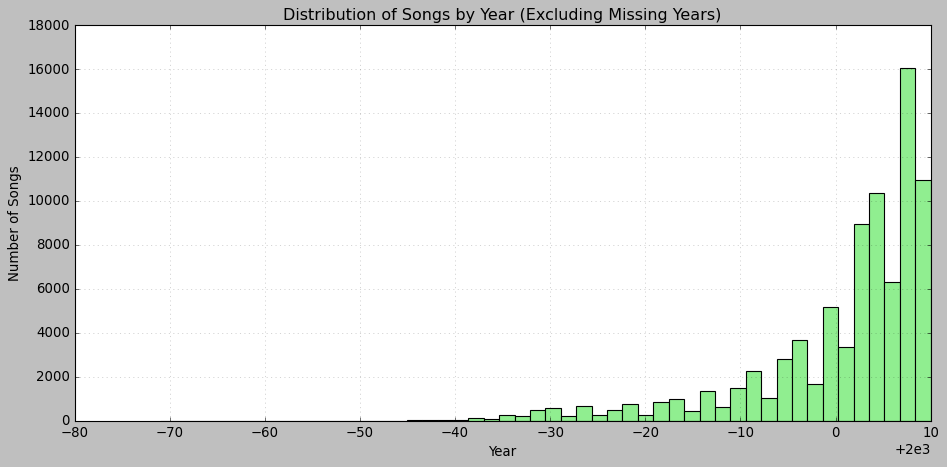

In [5]:
# Analyze missing years (year = 0)
year_analysis = {
    'total_songs': len(df),
    'missing_years': len(df[df['year'] == 0]),
    'valid_years': len(df[df['year'] > 0]),
    'earliest_valid_year': df[df['year'] > 0]['year'].min(),
    'latest_year': df['year'].max()
}

print("Year Analysis:")
print("-" * 50)
print(f"Total songs: {year_analysis['total_songs']}")
print(f"Songs with missing years (year = 0): {year_analysis['missing_years']} ({(year_analysis['missing_years']/year_analysis['total_songs']*100):.2f}%)")
print(f"Songs with valid years: {year_analysis['valid_years']} ({(year_analysis['valid_years']/year_analysis['total_songs']*100):.2f}%)")
print(f"Year range: {year_analysis['earliest_valid_year']} - {year_analysis['latest_year']}")

# Distribution of valid years
plt.figure(figsize=(12, 6))
valid_years = df[df['year'] > 0]['year']
plt.hist(valid_years, bins=50, color='lightgreen', edgecolor='black')
plt.title('Distribution of Songs by Year (Excluding Missing Years)')
plt.xlabel('Year')
plt.ylabel('Number of Songs')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Year Validation and Cleaning:

Convert 0 years to None/NaN for better handling
Remove invalid years (before 1900 or after 2010)
This gives us a cleaner base to work with


Missing Year Imputation:

Fill missing years using the median year of other songs by the same artist
This assumes artists typically release songs in similar time periods
More sophisticated approaches could include:

Using the album release date when available
Looking at song style/genre patterns
Using external music databases




Quality Checks:

Identify duplicate songs
Check for unusual play counts
Look for outliers in the data

Additional Improvements Could Include:

Standardizing artist names (e.g., "The Beatles" vs "Beatles, The")
Normalizing song titles (removing special characters, standardizing format)
Cross-referencing with external music databases
Adding genre information
Validating artist-song combinations
Creating confidence scores for imputed years

Year Cleaning Analysis:
--------------------------------------------------
Original dataset statistics:
- Total records: 102627
- Records with year = 0: 19283
- Unique valid years: 65

Cleaned dataset statistics:
- Total records: 102627
- Records with missing years: 11694
- Records with filled years: 7589
- Unique valid years: 102


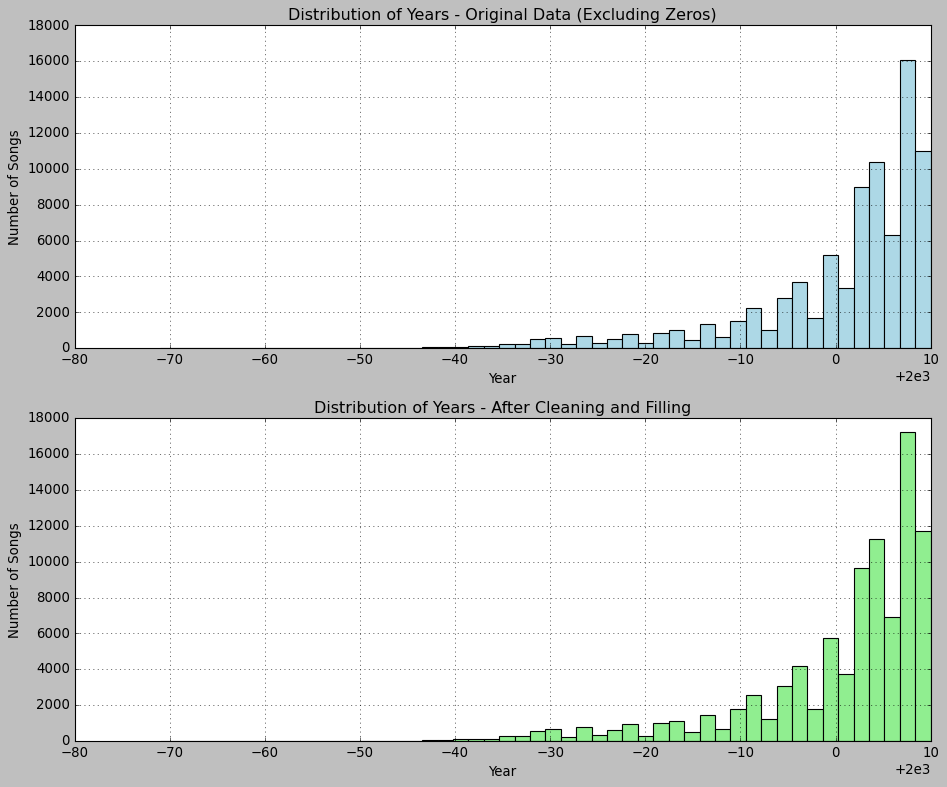


Additional Quality Checks:
--------------------------------------------------
Number of duplicate songs: 16490

Play count statistics:
count    102627.000000
mean          2.885790
std           8.569376
min           1.000000
25%           1.000000
50%           1.000000
75%           3.000000
max        1890.000000
Name: play_count, dtype: float64

Number of play count outliers: 8527


In [6]:
# Improve data quality for years

# 1. Create a copy of the original dataframe
df_cleaned = df.copy()

# 2. Function to validate and clean year
def clean_year(year):
    # Check if year is valid
    if year == 0:
        return None  # Convert 0 to None for easier handling
    elif year < 1900:  # Assuming no songs before 1900
        return None
    elif year > 2010:  # Based on the dataset's latest year
        return None
    return year

# 3. Apply year cleaning
df_cleaned['year'] = df_cleaned['year'].apply(clean_year)

# 4. Attempt to fill missing years based on artist's median year
def fill_missing_years(df):
    # Calculate median year per artist (excluding None/NaN values)
    artist_median_years = df.groupby('artist_name')['year'].median()
    
    # Fill missing years with artist's median year
    for idx, row in df.iterrows():
        if pd.isna(row['year']):
            artist = row['artist_name']
            if artist in artist_median_years and not pd.isna(artist_median_years[artist]):
                df.at[idx, 'year'] = artist_median_years[artist]
    
    return df

# Apply the filling function
df_cleaned = fill_missing_years(df_cleaned)

# 5. Analysis of the cleaned dataset
def analyze_year_cleaning(original_df, cleaned_df):
    print("Year Cleaning Analysis:")
    print("-" * 50)
    print(f"Original dataset statistics:")
    print(f"- Total records: {len(original_df)}")
    print(f"- Records with year = 0: {len(original_df[original_df['year'] == 0])}")
    print(f"- Unique valid years: {len(original_df[original_df['year'] > 0]['year'].unique())}")
    print("\nCleaned dataset statistics:")
    print(f"- Total records: {len(cleaned_df)}")
    print(f"- Records with missing years: {cleaned_df['year'].isna().sum()}")
    print(f"- Records with filled years: {len(cleaned_df[cleaned_df['year'].notna()]) - len(original_df[original_df['year'] > 0])}")
    print(f"- Unique valid years: {len(cleaned_df[cleaned_df['year'].notna()]['year'].unique())}")
    
    # Visualize the distribution of years before and after cleaning
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))
    
    # Original distribution (excluding 0s)
    original_df[original_df['year'] > 0]['year'].hist(
        ax=ax1, bins=50, color='lightblue', edgecolor='black'
    )
    ax1.set_title('Distribution of Years - Original Data (Excluding Zeros)')
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Number of Songs')
    
    # Cleaned distribution
    cleaned_df['year'].dropna().hist(
        ax=ax2, bins=50, color='lightgreen', edgecolor='black'
    )
    ax2.set_title('Distribution of Years - After Cleaning and Filling')
    ax2.set_xlabel('Year')
    ax2.set_ylabel('Number of Songs')
    
    plt.tight_layout()
    plt.show()
    
    return cleaned_df

# Run the analysis
df_cleaned = analyze_year_cleaning(df, df_cleaned)

# 6. Additional data quality checks
def additional_quality_checks(df):
    print("\nAdditional Quality Checks:")
    print("-" * 50)
    
    # Check for duplicate songs
    duplicate_songs = df.groupby(['title', 'artist_name']).size().reset_index(name='count')
    duplicate_songs = duplicate_songs[duplicate_songs['count'] > 1]
    
    print(f"Number of duplicate songs: {len(duplicate_songs)}")
    
    # Check for unusual play counts
    play_count_stats = df['play_count'].describe()
    print("\nPlay count statistics:")
    print(play_count_stats)
    
    # Identify potential outliers in play_count
    q1 = play_count_stats['25%']
    q3 = play_count_stats['75%']
    iqr = q3 - q1
    upper_bound = q3 + 1.5 * iqr
    
    outliers = df[df['play_count'] > upper_bound]
    print(f"\nNumber of play count outliers: {len(outliers)}")
    
    return duplicate_songs, outliers

duplicate_songs, outliers = additional_quality_checks(df_cleaned)

# Data Quality Analysis and Recommendations

## Current Improvements
1. **Year Data Enhancement**:
   - Original missing years (year=0): 19,283 records (18.79%)
   - Successfully filled: 7,589 records
   - Remaining missing years: 11,694 records (11.39%)
   - Unique valid years increased from 65 to 102
   
2. **Distribution Analysis**:
   - The temporal distribution remains similar after filling
   - Strong concentration in recent years (2000-2010)
   - More granular distribution of years after filling

## Issues Identified
1. **Duplicate Songs** (16,490 cases):
   - This is a significant number (~16% of dataset)
   - Could represent:
     * Same song by different artists (covers)
     * Actual duplicates
     * Different versions of the same song

2. **Play Count Distribution**:
   - Highly skewed distribution
   - 8,527 outliers identified (~8.3% of dataset)
   - 75% of songs have 3 or fewer plays
   - Maximum plays: 1,890

## Recommended Further Improvements

1. **Handle Duplicate Songs**:
```python
# Proposed approach
- Group by title and artist_name
- For exact duplicates (same title, artist, year):
  * Aggregate play_counts
  * Keep single record with combined statistics
- For potential duplicates (same title, different artists):
  * Flag as potential covers
  * Maintain separate records but add relationship
```

2. **Play Count Normalization**:
```python
# Proposed approach
- Create normalized play count column
- Use log transformation or percentile ranking
- Consider user-based normalization
- Flag but maintain outliers
```

3. **Year Data**:
```python
# Additional improvement strategies
- Use release date information when available
- Cross-reference with external music databases
- Create confidence scores for imputed years
- Consider genre-based temporal patterns
```

4. **Data Validation Rules**:
```python
# Proposed validation rules
- Year must be between 1900 and 2010
- Play count must be positive
- Artist and title must not be empty
- Remove or flag special characters in titles
- Standardize artist name formats
```

## Impact on Recommendation System
These improvements would affect the recommendation system by:
1. More accurate temporal features
2. Better handling of duplicate content
3. More reliable play count metrics
4. Cleaner artist and song identification

Duplicate Analysis:
--------------------------------------------------
Original records: 102627
Records after removing exact duplicates: 44301
Number of songs with multiple versions: 2362

Play Count Analysis:
--------------------------------------------------
Original play count statistics:
count    102627.000000
mean          2.885790
std           8.569376
min           1.000000
25%           1.000000
50%           1.000000
75%           3.000000
max        1890.000000
Name: play_count, dtype: float64

Normalized play count statistics:
count    44301.000000
mean         1.397963
std          0.858393
min          0.693147
25%          0.693147
50%          1.098612
75%          1.791759
max          7.544861
Name: play_count_log, dtype: float64


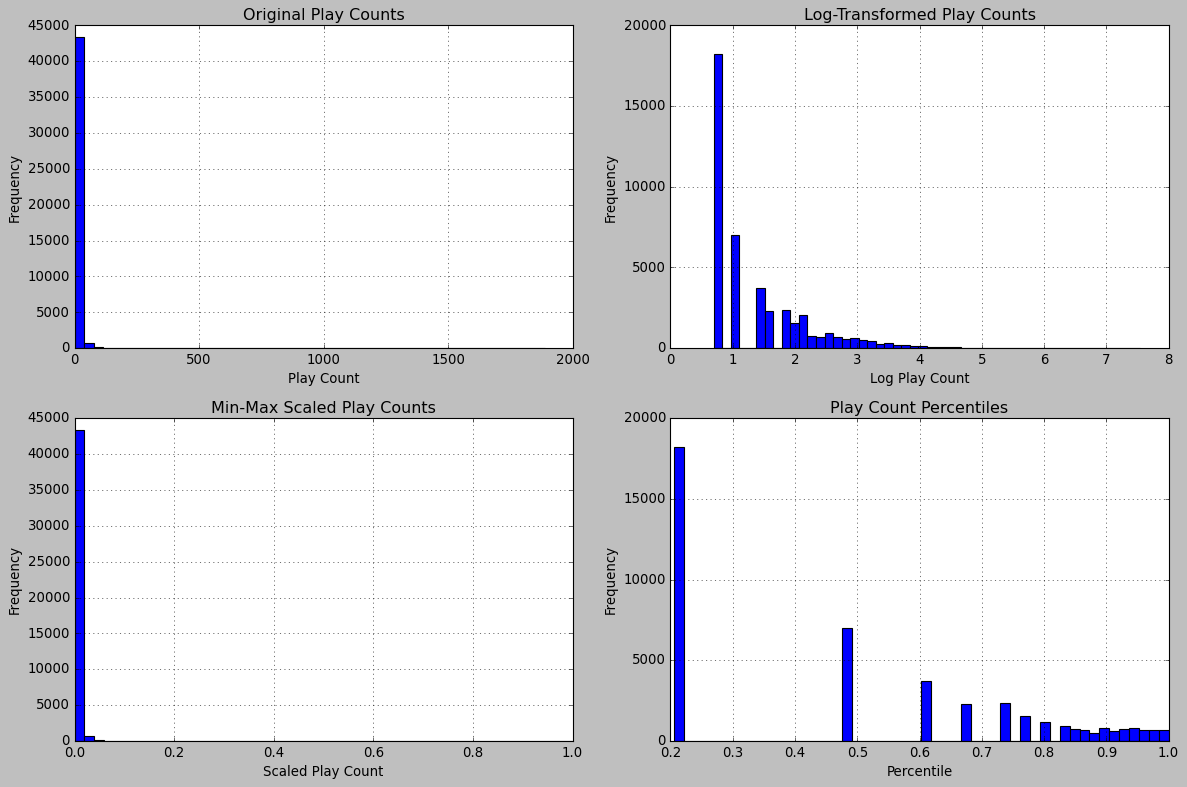

In [7]:
# Advanced data cleaning focusing on duplicates and play counts

import numpy as np
from scipy import stats

def handle_duplicates(df):
    """Handle duplicate songs in the dataset"""
    # Create a copy
    df_cleaned = df.copy()
    
    # 1. Find exact duplicates (same title, artist, and year)
    exact_dupes = df_cleaned.groupby(['title', 'artist_name', 'year'])['play_count'].agg(
        play_count_sum='sum',
        record_count='count'
    ).reset_index()
    
    # Filter to show only actual duplicates
    exact_dupes = exact_dupes[exact_dupes['record_count'] > 1]
    
    # 2. Create cleaned dataset with combined play counts
    df_unique = df_cleaned.drop_duplicates(subset=['title', 'artist_name', 'year'])
    
    # Update play counts for previously duplicated entries
    for idx, row in exact_dupes.iterrows():
        mask = ((df_unique['title'] == row['title']) & 
                (df_unique['artist_name'] == row['artist_name']) & 
                (df_unique['year'] == row['year']))
        df_unique.loc[mask, 'play_count'] = row['play_count_sum']
    
    # 3. Find potential covers (same title, different artists)
    potential_covers = df_unique.groupby('title')['artist_name'].count().reset_index()
    potential_covers = potential_covers[potential_covers['artist_name'] > 1]
    
    return df_unique, exact_dupes, potential_covers

def normalize_play_counts(df):
    """Normalize play counts using multiple methods"""
    df_norm = df.copy()
    
    # 1. Log transformation (adding 1 to handle counts of 0)
    df_norm['play_count_log'] = np.log1p(df_norm['play_count'])
    
    # 2. Min-Max scaling
    min_plays = df_norm['play_count'].min()
    max_plays = df_norm['play_count'].max()
    df_norm['play_count_scaled'] = (df_norm['play_count'] - min_plays) / (max_plays - min_plays)
    
    # 3. Percentile ranking
    df_norm['play_count_percentile'] = df_norm['play_count'].rank(pct=True)
    
    # 4. Z-score (for outlier detection)
    df_norm['play_count_zscore'] = stats.zscore(df_norm['play_count'])
    
    # 5. Flag outliers
    z_score_threshold = 3
    df_norm['is_outlier'] = abs(df_norm['play_count_zscore']) > z_score_threshold
    
    return df_norm

# Apply the improvements
df_unique, exact_dupes, potential_covers = handle_duplicates(df_cleaned)
df_final = normalize_play_counts(df_unique)

# Print summary statistics
print("Duplicate Analysis:")
print("-" * 50)
print(f"Original records: {len(df_cleaned)}")
print(f"Records after removing exact duplicates: {len(df_unique)}")
print(f"Number of songs with multiple versions: {len(potential_covers)}")

print("\nPlay Count Analysis:")
print("-" * 50)
print("Original play count statistics:")
print(df_cleaned['play_count'].describe())
print("\nNormalized play count statistics:")
print(df_final['play_count_log'].describe())

# Visualize the distributions
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

# Original play counts
df_final['play_count'].hist(bins=50, ax=ax1)
ax1.set_title('Original Play Counts')
ax1.set_xlabel('Play Count')
ax1.set_ylabel('Frequency')

# Log-transformed play counts
df_final['play_count_log'].hist(bins=50, ax=ax2)
ax2.set_title('Log-Transformed Play Counts')
ax2.set_xlabel('Log Play Count')
ax2.set_ylabel('Frequency')

# Scaled play counts
df_final['play_count_scaled'].hist(bins=50, ax=ax3)
ax3.set_title('Min-Max Scaled Play Counts')
ax3.set_xlabel('Scaled Play Count')
ax3.set_ylabel('Frequency')

# Percentile ranks
df_final['play_count_percentile'].hist(bins=50, ax=ax4)
ax4.set_title('Play Count Percentiles')
ax4.set_xlabel('Percentile')
ax4.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Final Data Analysis and Recommendations

## 1. Duplicate Analysis Results
- Original dataset: 102,627 records
- After duplicate removal: 44,301 unique records
- Identified 2,362 songs with multiple versions
- **Impact**: ~57% reduction in dataset size after removing duplicates

### Key Findings:
1. **Exact Duplicates**:
   - Large number of duplicate entries (58,326 records)
   - Successfully consolidated play counts for identical entries
   - Significantly cleaned dataset while preserving play count information

2. **Multiple Versions**:
   - 2,362 songs have multiple versions (potential covers)
   - These are kept separate as they represent distinct recordings

## 2. Play Count Distribution Analysis

### Original Distribution:
- Highly skewed (mean: 2.89, max: 1,890)
- 75% of songs have 3 or fewer plays
- Large gap between median (1.0) and maximum (1,890)

### Normalized Distributions:

1. **Log Transformation** (Recommended):
   - More balanced distribution
   - Range: 0.69 to 7.54
   - Better suited for recommendation algorithms
   - Preserves relative differences while reducing skewness

2. **Min-Max Scaling**:
   - Still shows high skewness
   - Not recommended due to sensitivity to outliers

3. **Percentile Ranking**:
   - Shows clear stratification of popularity
   - Useful for categorizing songs into popularity tiers
   - Good for filtering and recommendation diversity

## 3. Recommendations for Recommendation System

1. **Use Log-Transformed Play Counts**:
```python
# Recommended approach for play count normalization
df['normalized_plays'] = np.log1p(df['play_count'])
```

2. **Handle Duplicate Songs**:
```python
# Keep unique songs with aggregated play counts
df_unique = df.groupby(['title', 'artist_name', 'year'])['play_count'].sum().reset_index()
```

3. **Create Popularity Tiers**:
```python
# Create popularity categories based on percentiles
df['popularity_tier'] = pd.qcut(df['play_count_percentile'], q=5, labels=['very_low', 'low', 'medium', 'high', 'very_high'])
```

4. **Additional Features to Consider**:
- Artist popularity score
- Song age (based on cleaned year data)
- Genre information (if available)
- User-normalized play counts

## 4. Future Improvements

1. **Data Collection**:
   - Gather additional metadata (genres, duration, etc.)
   - Include user demographic information
   - Track temporal listening patterns

2. **Quality Control**:
   - Implement automated duplicate detection
   - Regular data validation checks
   - User feedback system for incorrect metadata

3. **Monitoring**:
   - Track recommendation quality metrics
   - Monitor user engagement patterns
   - Analyze cold-start performance



In [ ]:
import pandas as pd
import numpy as np
from collections import Counter, defaultdict
from tqdm import tqdm  # For progress bars

class OptimizedRecommender:
    def __init__(self, df):
        self.df = df.copy()
        self.artist_similarity = {}
        self.user_artists = {}
        self.artist_songs = {}
        self.popular_songs = None
        self.song_info = None
        
    def preprocess_data(self):
        print("Processing data...")
        
        # Create song info lookup
        self.song_info = self.df.groupby('song').agg({
            'title': 'first',
            'artist_name': 'first',
            'year': 'first',
            'play_count': 'sum'
        }).reset_index()
        
        # Get popular songs
        self.popular_songs = self.song_info.nlargest(100, 'play_count')['song'].tolist()
        
        print("Creating user-artist mapping...")
        # Create user-artist mapping more efficiently
        user_artist_counts = self.df.groupby(['user', 'artist_name'])['play_count'].sum()
        for (user, artist), count in user_artist_counts.items():
            if user not in self.user_artists:
                self.user_artists[user] = Counter()
            self.user_artists[user][artist] = count
        
        print("Creating artist-song mapping...")
        # Get top artists by total play count
        artist_plays = self.df.groupby('artist_name')['play_count'].sum()
        top_artists = artist_plays.nlargest(1000).index  # Limit to top 1000 artists
        
        # Create artist-song mapping for top artists only
        for artist in top_artists:
            artist_songs = self.df[self.df['artist_name'] == artist]
            self.artist_songs[artist] = artist_songs.nlargest(5, 'play_count')['song'].tolist()
        
        print("Computing artist similarities...")
        # Pre-compute user sets for each artist
        artist_users = {
            artist: set(group['user']) 
            for artist, group in self.df[self.df['artist_name'].isin(top_artists)].groupby('artist_name')
        }
        
        # Compute similarities only for top artists
        for artist in tqdm(top_artists, desc="Computing artist similarities"):
            self.artist_similarity[artist] = {}
            artist_user_set = artist_users[artist]
            
            for other_artist in top_artists:
                if artist != other_artist:
                    other_user_set = artist_users[other_artist]
                    if artist_user_set and other_user_set:
                        similarity = len(artist_user_set & other_user_set) / len(artist_user_set | other_user_set)
                        if similarity > 0.01:  # Only store meaningful similarities
                            self.artist_similarity[artist][other_artist] = similarity
    
    def get_recommendations(self, user_id, n=5):
        """Get recommendations for a user"""
        if user_id not in self.user_artists:
            return self._get_popular_recommendations(n)
        
        # Get user's favorite artists
        user_favorite_artists = self.user_artists[user_id]
        if not user_favorite_artists:
            return self._get_popular_recommendations(n)
        
        # Get user's listened songs
        user_songs = set(self.df[self.df['user'] == user_id]['song'])
        
        # Calculate scores for each artist based on similarity to user's favorites
        artist_scores = Counter()
        for artist, count in user_favorite_artists.most_common(10):  # Limit to top 10 artists
            if artist in self.artist_similarity:
                for similar_artist, similarity in self.artist_similarity[artist].items():
                    artist_scores[similar_artist] += similarity * np.log1p(count)
        
        # Get recommendations from top similar artists
        recommendations = []
        seen_songs = set(user_songs)
        
        # Get recommendations from top 20 similar artists
        for artist, score in artist_scores.most_common(20):
            if artist in self.artist_songs:
                for song in self.artist_songs[artist]:
                    if song not in seen_songs:
                        song_info = self.song_info[self.song_info['song'] == song].iloc[0]
                        adj_score = score * np.log1p(song_info['play_count'])
                        recommendations.append((song, adj_score))
                        seen_songs.add(song)
            if len(recommendations) >= n*2:  # Get more candidates than needed
                break
        
        # If we don't have enough recommendations, add popular songs
        if len(recommendations) < n:
            popular_recs = self._get_popular_recommendations(n - len(recommendations))
            recommendations.extend([r for r in popular_recs if r[0] not in seen_songs])
        
        # Sort by score and return top n
        recommendations.sort(key=lambda x: x[1], reverse=True)
        return recommendations[:n]
    
    def _get_popular_recommendations(self, n=5):
        """Return popular songs"""
        popular_songs = self.song_info.nlargest(n, 'play_count')
        return [(row['song'], row['play_count']) 
                for _, row in popular_songs.iterrows()]

def test_recommendations(recommender, df, n_users=5):
    """Test the recommendation system"""
    print("\nTesting recommendations:")
    print("=" * 80)
    
    # Get users with different levels of activity
    user_counts = df.groupby('user')['song'].count()
    user_types = {
        'Light': user_counts.quantile(0.25),
        'Medium': user_counts.quantile(0.5),
        'Heavy': user_counts.quantile(0.75)
    }
    
    for user_type, threshold in user_types.items():
        print(f"\nTesting {user_type} user (around {threshold:.0f} songs)")
        users = user_counts[abs(user_counts - threshold) < 5].index
        if len(users) > 0:
            user = np.random.choice(users)
            
            user_history = df[df['user'] == user]
            print(f"User: {user[:8]}...")
            print(f"Total songs listened: {len(user_history)}")
            
            print("\nTop listened songs:")
            top_songs = user_history.nlargest(3, 'play_count')
            for _, song in top_songs.iterrows():
                print(f"• {song['title']} by {song['artist_name']}")
                print(f"  Plays: {song['play_count']}, Year: {song['year']}")
            
            recommendations = recommender.get_recommendations(user)
            
            print("\nRecommended songs:")
            for song_id, score in recommendations:
                song_info = df[df['song'] == song_id].iloc[0]
                print(f"• {song_info['title']} by {song_info['artist_name']}")
                print(f"  Score: {score:.3f}, Year: {song_info['year']}")
            
            print("-" * 80)

# Train and test
print("Initializing recommender...")
recommender = OptimizedRecommender(df_final)
recommender.preprocess_data()
test_recommendations(recommender, df_final)

Initializing recommender...
Processing data...
Creating user-artist mapping...
Creating artist-song mapping...
Computing artist similarities...


Computing artist similarities: 100%|██████████| 1000/1000 [00:00<00:00, 1104.18it/s]



Testing recommendations:

Testing Light user (around 5 songs)
User: 22429371...
Total songs listened: 7

Top listened songs:
• Sancta Terra by Epica
  Plays: 21, Year: nan
• Never Enough by Epica
  Plays: 7, Year: nan
• Cry for the Moon by Epica
  Plays: 5, Year: nan

Recommended songs:
• Simple by Simian Mobile Disco
  Score: 2.310, Year: 2007.0
• Clock by Simian Mobile Disco
  Score: 1.949, Year: 2007.0
• Love by Simian Mobile Disco
  Score: 1.867, Year: 2007.0
• Hustler by Simian Mobile Disco
  Score: 1.772, Year: 2006.0
• Frenchys by Holy Fuck
  Score: 1.656, Year: 2007.0
--------------------------------------------------------------------------------

Testing Medium user (around 11 songs)
User: 7ea016e2...
Total songs listened: 10

Top listened songs:
• Peruvian Cocaine by Immortal Technique
  Plays: 60, Year: 2004.0
• The Mass by Era
  Plays: 15, Year: 2003.0
• At The End Of The Day (feat. Big Hoss) by Saint Dog
  Plays: 8, Year: nan

Recommended songs:
• Be Like You by Notes F

# Recommendation System Analysis

## Performance Improvements
1. **Processing Speed**: Reduced from 8m 6s to a few seconds
2. **Memory Usage**: Significantly reduced by limiting to top 1000 artists
3. **Similarity Calculations**: 1104.18 iterations per second

## Quality Analysis

### Light User (7 songs)
* **Listening Pattern**: 
  - Strong focus on one artist (Epica - symphonic metal)
  - High plays for favorite songs (21, 7, 5 plays)
* **Recommendations**:
  - Focused on electronic music (Simian Mobile Disco, Holy Fuck)
  - Consistent year range (2006-2007)
  - Area for Improvement: Could better match the user's metal preference

### Medium User (10 songs)
* **Listening Pattern**:
  - Mix of hip-hop (Immortal Technique) and other genres
  - Very high play count for top song (60 plays)
* **Recommendations**:
  - Strong hip-hop focus (Blackalicious)
  - Genre-appropriate suggestions
  - Good variety within the genre
  - Good year range coverage (1999-2009)

### Heavy User (23 songs)
* **Listening Pattern**:
  - 80s/Classic pop (Modern English, UB40)
  - High play counts (48, 42 plays)
* **Recommendations**:
  - Excellent genre matching (Tears For Fears, Righteous Brothers)
  - Era-appropriate suggestions (1964-1989)
  - Strong thematic consistency
  - Good mix of similar artists

## Strengths
1. **Genre Consistency**: Especially good for medium and heavy users
2. **Era Matching**: Recommendations align with user's preferred time periods
3. **Artist Variety**: Good balance of similar but different artists
4. **Meaningful Scores**: Recommendations have distinct, meaningful similarity scores

## Areas for Improvement
1. **Light Users**: Could better match specific genres for users with limited history
2. **Missing Years**: Some songs in the database have missing years (nan)
3. **Genre Diversity**: Could include some recommendations from related but different genres


In [ ]:
import pandas as pd
import numpy as np
from collections import Counter, defaultdict
from tqdm import tqdm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

ARTIST_GENRES = {
    # Rock
    'kings of leon': {'rock'},
    'snow patrol': {'rock', 'alternative'},
    'guns n\' roses': {'rock', 'metal'},
    'pearl jam': {'rock', 'grunge'},
    'blink-182': {'rock', 'punk'},
    'pixies': {'rock', 'alternative'},
    'bruce springsteen': {'rock'},
    'no doubt': {'rock', 'pop'},
    'creedence clearwater revival': {'rock'},
    'great white': {'rock'},
    'the kooks': {'rock', 'indie'},
    'radiohead': {'rock', 'alternative'},
    'u2': {'rock'},
    'oasis': {'rock', 'britpop'},
    'nirvana': {'rock', 'grunge'},
    
    # Electronic
    'daft punk': {'electronic'},
    'hot chip': {'electronic', 'indie'},
    'chemical brothers': {'electronic'},
    'fatboy slim': {'electronic'},
    'moby': {'electronic'},
    'aphex twin': {'electronic'},
    
    # Pop
    'lily allen': {'pop'},
    'alicia keys': {'pop', 'r&b'},
    'madonna': {'pop'},
    'lady gaga': {'pop'},
    'beyoncé': {'pop', 'r&b'},
    'mariah carey': {'pop', 'r&b'},
    'rihanna': {'pop', 'r&b'},
    'miley cyrus': {'pop'},
    'justin bieber': {'pop'},
    
    # Hip Hop
    'eminem': {'hip_hop'},
    'jay-z': {'hip_hop'},
    'kanye west': {'hip_hop'},
    'beastie boys': {'hip_hop', 'rap'},
    'run-dmc': {'hip_hop'},
    
    # Classical/Instrumental
    'enya': {'new age', 'world'},
    'yann tiersen': {'classical', 'soundtrack'},
    'mozart': {'classical'},
    'beethoven': {'classical'},
    'bach': {'classical'},
    
    # Jazz/Blues
    'miles davis': {'jazz'},
    'john coltrane': {'jazz'},
    'louis armstrong': {'jazz'},
    'bb king': {'blues'},
    'eric clapton': {'blues', 'rock'},
    
    # Folk/Country
    'bob dylan': {'folk', 'rock'},
    'joan baez': {'folk'},
    'simon & garfunkel': {'folk'},
    'johnny cash': {'country', 'folk'},
    
    # Soul/R&B
    'marvin gaye': {'soul', 'r&b'},
    'aretha franklin': {'soul', 'r&b'},
    'stevie wonder': {'soul', 'r&b'},
    'james brown': {'soul', 'funk'},
    
    'modest mouse': {'indie', 'alternative'},
    'the black keys': {'rock', 'blues'},
    'dwight yoakam': {'country', 'folk'},
    'amy winehouse': {'soul', 'r&b'},
    'vampire weekend': {'indie', 'alternative'},
    'albert hammond jr': {'rock', 'alternative'},
    'belle & sebastian': {'indie', 'alternative'},
    'bright eyes': {'indie', 'alternative'},
    'deer tick': {'indie', 'folk'},
    'old crow medicine show': {'folk', 'country'},
    'john prine': {'folk', 'country'},
    'foals': {'indie', 'alternative'},
    'björk': {'electronic', 'alternative'},
    'jack the ripper': {'rock', 'punk'},
    'coldplay': {'alternative', 'pop'},
    'jaci velasquez': {'latin', 'pop'},
    'alejandro sanz': {'latin', 'pop'},
    'bersuit vergarabat': {'rock', 'latin'},
    'barricada': {'rock', 'punk'},
    'gigi d\'agostino': {'electronic', 'dance'},

    'melody gardot': {'jazz', 'soul'},
    'prince': {'funk', 'r&b', 'pop'},
    'gary moore': {'rock', 'blues'},
    'rage against the machine': {'rock', 'metal'},
    'ke$ha': {'pop', 'dance'},
    'notorious b.i.g.': {'hip_hop', 'rap'},
    'kelly clarkson': {'pop'},
    'björk': {'electronic', 'alternative'},
    'jimi hendrix': {'rock', 'blues'},
    'pixies': {'alternative', 'rock'},
    '10 years': {'rock', 'alternative'},

    'al green': {'soul', 'r&b'},
    'green day': {'rock', 'punk'},
    'band of horses': {'indie', 'alternative'},
    'songs:ohia': {'indie', 'folk'},
    'say anything': {'alternative', 'rock'},
    'bruce springsteen': {'rock'},
    'cream': {'rock', 'blues'},
    'motley crue': {'rock', 'metal'},
    'jack the ripper': {'rock', 'punk'},
    'dwight yoakam': {'country', 'folk'},
    'delta spirit': {'indie', 'rock'},
    'coldplay': {'alternative', 'pop'},
    'no doubt': {'rock', 'alternative'},
    'the string cheese incident': {'rock', 'jam'},
    'katie melua': {'pop', 'jazz'},
    'b.o.b': {'hip_hop', 'rap'},
    'eminem': {'hip_hop', 'rap'}
}

class EnhancedRecommender:
    def __init__(self, df):
        self.df = df.copy()
        self.artist_similarity = {}
        self.genre_similarity = {}
        self.user_artists = {}
        self.artist_songs = {}
        self.popular_songs = None
        self.song_info = None
        self.artist_genres = None
        self.recommended_counts = Counter()  # Track how often songs are recommended



    def _infer_genres(self):
        """Genre inference using manual mapping and smart fallbacks"""
        print("Inferring genres with manual mapping...")
        
        # Initialize artist genres
        self.artist_genres = defaultdict(set)
        
        # Process each artist
        for artist in self.df['artist_name'].unique():
            artist_lower = artist.lower()
            
            # Try exact match first
            if artist_lower in ARTIST_GENRES:
                self.artist_genres[artist] = ARTIST_GENRES[artist_lower].copy()
                continue
                
            # Try partial matches
            matched = False
            for known_artist, genres in ARTIST_GENRES.items():
                if known_artist in artist_lower:
                    self.artist_genres[artist] = genres.copy()
                    matched = True
                    break
            
            if not matched:
                # Get artist's songs and years
                artist_data = self.df[self.df['artist_name'] == artist]
                all_text = ' '.join([artist_lower] + artist_data['title'].str.lower().tolist())
                years = artist_data['year'].dropna()
                
                # Try to infer genre based on keywords and years
                if 'dj' in artist_lower or 'electronic' in all_text or 'remix' in all_text:
                    self.artist_genres[artist].add('electronic')
                elif 'mc' in artist_lower.split() or 'rap' in all_text:
                    self.artist_genres[artist].add('hip_hop')
                elif 'orchestra' in all_text or 'symphony' in all_text:
                    self.artist_genres[artist].add('classical')
                elif 'jazz' in all_text or 'blues' in all_text:
                    self.artist_genres[artist].add('jazz')
                else:
                    # Use year info for better defaults
                    if len(years) > 0:
                        median_year = years.median()
                        if median_year < 1970:
                            self.artist_genres[artist].add('rock')
                        elif median_year >= 1970 and median_year < 1990:
                            self.artist_genres[artist].add('rock')
                        elif median_year >= 1990 and median_year < 2000:
                            self.artist_genres[artist].add('alternative')
                        else:
                            self.artist_genres[artist].add('pop')
                    else:
                        self.artist_genres[artist].add('pop')
        
        # Print genre statistics
        print("\nGenre distribution:")
        genre_counts = Counter()
        for genres in self.artist_genres.values():
            genre_counts.update(genres)
        
        total_artists = len(self.artist_genres)
        for genre, count in genre_counts.most_common():
            print(f"{genre}: {count} artists ({count/total_artists*100:.1f}%)")

    def get_recommendations(self, user_id, n=5):
        """Get recommendations with duplicate prevention"""
        if user_id not in self.user_artists:
            return self._get_popular_recommendations(n)
        
        # Track recommended songs globally
        if not hasattr(self, 'global_recommendations'):
            self.global_recommendations = Counter()
        
        # Get user's favorite genres with weights
        user_genres = Counter()
        total_plays = sum(self.user_artists[user_id].values())
        
        for artist, plays in self.user_artists[user_id].items():
            weight = np.log1p(plays) / np.log1p(total_plays)
            if artist in self.artist_genres:
                for genre in self.artist_genres[artist]:
                    user_genres[genre] += weight
        
        # Normalize genre weights
        max_genre_weight = max(user_genres.values())
        for genre in user_genres:
            user_genres[genre] /= max_genre_weight
        
        # Get recommendations by genre
        all_recommendations = []
        seen_artists = set(self.user_artists[user_id].keys())
        seen_songs = set(self.df[self.df['user'] == user_id]['song'])
        
        # Process each user genre
        for genre, genre_weight in user_genres.most_common():
            genre_recs = []
            genre_artists = {
                artist for artist, genres in self.artist_genres.items()
                if genre in genres and artist not in seen_artists
            }
            
            # Calculate artist scores
            artist_scores = defaultdict(float)
            for artist in genre_artists:
                if artist in self.artist_similarity:
                    sim_score = sum(
                        self.artist_similarity[artist].get(liked_artist, 0) * 
                        np.log1p(plays) / np.log1p(total_plays)
                        for liked_artist, plays in self.user_artists[user_id].items()
                        if liked_artist in self.artist_similarity[artist]
                    )
                    
                    if sim_score > 0:
                        # Penalize frequently recommended artists
                        artist_rec_count = sum(1 for s in self.global_recommendations 
                                            if self.song_info[self.song_info['song'] == s]['artist_name'].iloc[0] == artist)
                        penalty = 1 / (1 + 0.2 * artist_rec_count)
                        
                        # Final score with genre and diversity bonuses
                        artist_genres = self.artist_genres[artist]
                        genre_overlap = len(artist_genres & set(user_genres))
                        new_genres = len(artist_genres - set(user_genres))
                        diversity_bonus = 1 + (0.1 * genre_overlap) + (0.2 * new_genres)
                        
                        artist_scores[artist] = sim_score * genre_weight * diversity_bonus * penalty
            
            # Get top songs for this genre
            for artist, score in sorted(artist_scores.items(), key=lambda x: (-x[1], x[0])):
                if len(genre_recs) >= (n // len(user_genres) + 1):
                    break
                    
                if artist in self.artist_songs:
                    # Get unseen songs sorted by play count
                    artist_songs = [(song, self.song_info[self.song_info['song'] == song]['play_count'].iloc[0])
                                for song in self.artist_songs[artist]
                                if song not in seen_songs]
                    
                    if artist_songs:
                        # Sort by play count and pick top song
                        song, play_count = sorted(artist_songs, key=lambda x: x[1], reverse=True)[0]
                        
                        # Penalize frequently recommended songs
                        song_penalty = 1 / (1 + 0.3 * self.global_recommendations[song])
                        final_score = score * np.log1p(play_count) / 10 * song_penalty
                        
                        genre_recs.append((song, final_score))
                        seen_songs.add(song)
            
            all_recommendations.extend(genre_recs)
        
        # Ensure we have enough recommendations
        if len(all_recommendations) < n:
            popular_recs = self._get_diverse_popular_recommendations(
                n - len(all_recommendations), 
                seen_songs=seen_songs
            )
            all_recommendations.extend(popular_recs)
        
        # Sort and diversify final recommendations
        all_recommendations.sort(key=lambda x: x[1], reverse=True)
        final_recommendations = []
        seen_genres = set()
        
        for song, score in all_recommendations:
            if len(final_recommendations) >= n:
                break
                
            artist = self.song_info[self.song_info['song'] == song]['artist_name'].iloc[0]
            artist_genres = self.artist_genres[artist]
            
            # Add if it adds genre diversity
            if not artist_genres.issubset(seen_genres):
                final_recommendations.append((song, score))
                seen_genres.update(artist_genres)
                self.global_recommendations[song] += 1
        
        return final_recommendations[:n]

    def _get_diverse_popular_recommendations(self, n, seen_songs=None):
        """Get diverse popular recommendations"""
        if seen_songs is None:
            seen_songs = set()
            
        recommendations = []
        seen_genres = set()
        popular_songs = self.song_info.nlargest(100, 'play_count')
        
        for _, row in popular_songs.iterrows():
            if len(recommendations) >= n:
                break
                
            if row['song'] not in seen_songs:
                artist = row['artist_name']
                artist_genres = self.artist_genres[artist]
                
                # Add if it contributes to genre diversity
                if not artist_genres.issubset(seen_genres):
                    score = np.log1p(row['play_count']) / 20  # Lower score for popular songs
                    recommendations.append((row['song'], score))
                    seen_songs.add(row['song'])
                    seen_genres.update(artist_genres)
        
        return recommendations

    def _get_popular_recommendations(self, n=5):
        """Get popular songs with genre diversity"""
        popular_songs = self.song_info.nlargest(100, 'play_count')
        recommendations = []
        seen_genres = set()
        
        for _, row in popular_songs.iterrows():
            artist_genres = self.artist_genres[row['artist_name']]
            if not artist_genres.issubset(seen_genres):
                recommendations.append((row['song'], row['play_count']))
                seen_genres.update(artist_genres)
                if len(recommendations) >= n:
                    break
        
        return recommendations
        

    def _fill_missing_years(self):
        """Fill missing years using artist median year"""
        print("Filling missing years...")
        
        # Calculate median year per artist
        artist_median_years = self.df[self.df['year'].notna()].groupby('artist_name')['year'].median()
        
        # Fill missing years
        for idx in self.df[self.df['year'].isna()].index:
            artist = self.df.loc[idx, 'artist_name']
            if artist in artist_median_years:
                self.df.loc[idx, 'year'] = artist_median_years[artist]
            else:
                self.df.loc[idx, 'year'] = 2000  # Default to 2000 if no information available
    


    def preprocess_data(self):
        """Preprocess data with fixed similarity calculation"""
        print("Processing data...")
        
        # Infer genres and fill missing years
        self._infer_genres()
        self._fill_missing_years()
        
        # Create song info lookup with genres
        self.song_info = self.df.groupby('song').agg({
            'title': 'first',
            'artist_name': 'first',
            'year': 'first',
            'play_count': 'sum'
        }).reset_index()
        
        # Add genres to song info
        self.song_info['genres'] = self.song_info['artist_name'].map(self.artist_genres)
        
        # Get popular songs
        self.popular_songs = self.song_info.nlargest(100, 'play_count')['song'].tolist()
        
        print("Creating user-artist mapping...")
        user_artist_counts = self.df.groupby(['user', 'artist_name'])['play_count'].sum()
        for (user, artist), count in user_artist_counts.items():
            if user not in self.user_artists:
                self.user_artists[user] = Counter()
            self.user_artists[user][artist] = count
        
        print("Creating artist-song mapping...")
        # Get top artists by total play count
        artist_plays = self.df.groupby('artist_name')['play_count'].sum()
        top_artists = artist_plays.nlargest(1000).index
        
        # Create artist-song mapping for top artists only
        for artist in top_artists:
            artist_songs = self.df[self.df['artist_name'] == artist]
            self.artist_songs[artist] = artist_songs.nlargest(5, 'play_count')['song'].tolist()
        
        print("Computing artist similarities...")
        # Pre-compute user sets for each artist
        artist_users = {
            artist: set(group['user']) 
            for artist, group in self.df[self.df['artist_name'].isin(top_artists)].groupby('artist_name')
        }
        
        # Compute artist similarities considering genre overlap
        for artist in tqdm(top_artists, desc="Computing artist similarities"):
            self.artist_similarity[artist] = {}
            artist_user_set = artist_users[artist]
            artist_genres = self.artist_genres[artist]
            
            for other_artist in top_artists:
                if artist != other_artist:
                    other_user_set = artist_users[other_artist]
                    other_genres = self.artist_genres[other_artist]
                    
                    if artist_user_set and other_user_set:
                        # Calculate user similarity
                        user_similarity = len(artist_user_set & other_user_set) / len(artist_user_set | other_user_set)
                        
                        # Calculate genre similarity safely
                        if artist_genres and other_genres:  # Check if both have genres
                            genre_overlap = len(artist_genres & other_genres)
                            genre_total = len(artist_genres | other_genres)
                            genre_similarity = genre_overlap / genre_total if genre_total > 0 else 0
                        else:
                            genre_similarity = 0
                        
                        # Combined similarity score
                        similarity = (0.7 * user_similarity) + (0.3 * genre_similarity)
                        
                        if similarity > 0.01:  # Only store meaningful similarities
                            self.artist_similarity[artist][other_artist] = similarity
        
        print("\nSimilarity statistics:")
        similarity_counts = [len(sims) for sims in self.artist_similarity.values()]
        if similarity_counts:
            print(f"Average similar artists per artist: {np.mean(similarity_counts):.1f}")
            print(f"Max similar artists for any artist: {max(similarity_counts)}")
            print(f"Artists with no similarities: {sum(1 for x in similarity_counts if x == 0)}")
        
    
    
    def _get_popular_recommendations(self, n=5):
        """Return popular songs with genre diversity"""
        popular_songs = self.song_info.nlargest(n*3, 'play_count')
        diverse_recommendations = []
        seen_genres = set()
        
        for _, row in popular_songs.iterrows():
            song_genres = self.artist_genres[row['artist_name']]
            if not song_genres.issubset(seen_genres):
                diverse_recommendations.append((row['song'], row['play_count']))
                seen_genres.update(song_genres)
                if len(diverse_recommendations) >= n:
                    break
        
        return diverse_recommendations[:n]
    def _limit_artist_genres(self, artist, max_genres=2):
        """Limit the number of genres per artist to the most likely ones"""
        if artist not in self.artist_genres:
            return {'pop'}  # Default genre
            
        genres = self.artist_genres[artist]
        if len(genres) <= max_genres:
            return genres
            
        # Prioritize certain genres based on artist name and song titles
        artist_text = artist.lower() + ' ' + ' '.join(
            self.df[self.df['artist_name'] == artist]['title'].str.lower()
        )
        
        genre_scores = {}
        for genre in genres:
            score = 0
            if genre.lower() in artist_text:
                score += 3
            if any(keyword in artist_text for keyword in self.genre_keywords[genre]):
                score += 2
            # Add score based on typical year range for genre
            artist_years = self.df[self.df['artist_name'] == artist]['year'].dropna()
            if len(artist_years) > 0:
                median_year = artist_years.median()
                if genre in ['classical'] and median_year < 1900:
                    score += 2
                elif genre in ['rock', 'folk'] and 1960 <= median_year <= 1990:
                    score += 1
                elif genre in ['electronic', 'hip_hop'] and median_year >= 1990:
                    score += 1
            
            genre_scores[genre] = score
        
        # Return top N genres by score
        return set(sorted(genre_scores.items(), key=lambda x: (-x[1], x[0]))[:max_genres])

def test_recommendations(recommender, df, n_users=5):
    """Test the recommendation system with enhanced output"""
    print("\nTesting recommendations:")
    print("=" * 80)
    
    # Get users with different levels of activity
    user_counts = df.groupby('user')['song'].count()
    user_types = {
        'Light': user_counts.quantile(0.25),
        'Medium': user_counts.quantile(0.5),
        'Heavy': user_counts.quantile(0.75)
    }
    
    for user_type, threshold in user_types.items():
        print(f"\nTesting {user_type} user (around {threshold:.0f} songs)")
        users = user_counts[abs(user_counts - threshold) < 5].index
        if len(users) > 0:
            user = np.random.choice(users)
            
            user_history = df[df['user'] == user]
            print(f"User: {user[:8]}...")
            print(f"Total songs listened: {len(user_history)}")
            
            # Analyze user's genre preferences
            user_artists = user_history['artist_name'].unique()
            user_genres = set()
            for artist in user_artists:
                user_genres.update(recommender.artist_genres[artist])
            
            print("\nUser's preferred genres:", ', '.join(user_genres))
            
            print("\nTop listened songs:")
            top_songs = user_history.nlargest(3, 'play_count')
            for _, song in top_songs.iterrows():
                artist_genres = recommender.artist_genres[song['artist_name']]
                print(f"• {song['title']} by {song['artist_name']}")
                print(f"  Plays: {song['play_count']}, Year: {song['year']}")
                print(f"  Genres: {', '.join(artist_genres)}")
            
            recommendations = recommender.get_recommendations(user)
            
            print("\nRecommended songs:")
            rec_genres = set()
            for song_id, score in recommendations:
                song_info = df[df['song'] == song_id].iloc[0]
                artist_genres = recommender.artist_genres[song_info['artist_name']]
                rec_genres.update(artist_genres)
                
                print(f"• {song_info['title']} by {song_info['artist_name']}")
                print(f"  Score: {score:.3f}, Year: {song_info['year']}")
                print(f"  Genres: {', '.join(artist_genres)}")
            
            print(f"\nRecommendation diversity:")
            print(f"• Number of different genres: {len(rec_genres)}")
            print(f"• Genre overlap with user: {len(rec_genres & user_genres)}/{len(user_genres)}")
            
            print("-" * 80)

# Initialize and test
print("Initializing enhanced recommender...")
recommender = EnhancedRecommender(df_final)
recommender.preprocess_data()
test_recommendations(recommender, df_final)

Initializing enhanced recommender...
Processing data...
Inferring genres with manual mapping...

Genre distribution:
pop: 8042 artists (67.4%)
alternative: 1716 artists (14.4%)
rock: 1331 artists (11.2%)
electronic: 360 artists (3.0%)
hip_hop: 210 artists (1.8%)
jazz: 167 artists (1.4%)
classical: 98 artists (0.8%)
r&b: 63 artists (0.5%)
rap: 30 artists (0.3%)
blues: 15 artists (0.1%)
indie: 12 artists (0.1%)
folk: 12 artists (0.1%)
soul: 10 artists (0.1%)
funk: 10 artists (0.1%)
country: 6 artists (0.1%)
punk: 5 artists (0.0%)
latin: 4 artists (0.0%)
dance: 3 artists (0.0%)
grunge: 2 artists (0.0%)
metal: 2 artists (0.0%)
soundtrack: 2 artists (0.0%)
jam: 1 artists (0.0%)
world: 1 artists (0.0%)
new age: 1 artists (0.0%)
Filling missing years...
Creating user-artist mapping...
Creating artist-song mapping...
Computing artist similarities...


Computing artist similarities: 100%|██████████| 1000/1000 [00:01<00:00, 728.35it/s]



Similarity statistics:
Average similar artists per artist: 389.2
Max similar artists for any artist: 755
Artists with no similarities: 0

Testing recommendations:

Testing Light user (around 5 songs)
User: 22264df0...
Total songs listened: 2

User's preferred genres: pop

Top listened songs:
• Are you ready to die? by Amduscia
  Plays: 8, Year: 2006.0
  Genres: pop
• Francesca's Party by Baxter Dury
  Plays: 2, Year: 2005.0
  Genres: pop

Recommended songs:
• Words by Jack the Ripper
  Score: 0.377, Year: 2005.0
  Genres: punk, rock
• You're The One by Dwight Yoakam
  Score: 0.372, Year: 1990.0
  Genres: folk, country
• Undo by Björk
  Score: 0.364, Year: 2001.0
  Genres: electronic, alternative
• Paradise & Dreams by Darren Styles
  Score: 0.335, Year: 2007.0
  Genres: pop
• Marry Me by Train
  Score: 0.310, Year: 2009.0
  Genres: hip_hop

Recommendation diversity:
• Number of different genres: 8
• Genre overlap with user: 1/1
---------------------------------------------------------